In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
boston = datasets.load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
x = boston.data
y = pd.Series(boston.target, name = 'MEDV')
boston_ds = pd.DataFrame(x, columns = boston.feature_names)
df = pd.merge(boston_ds, y, left_index = True, right_index = True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

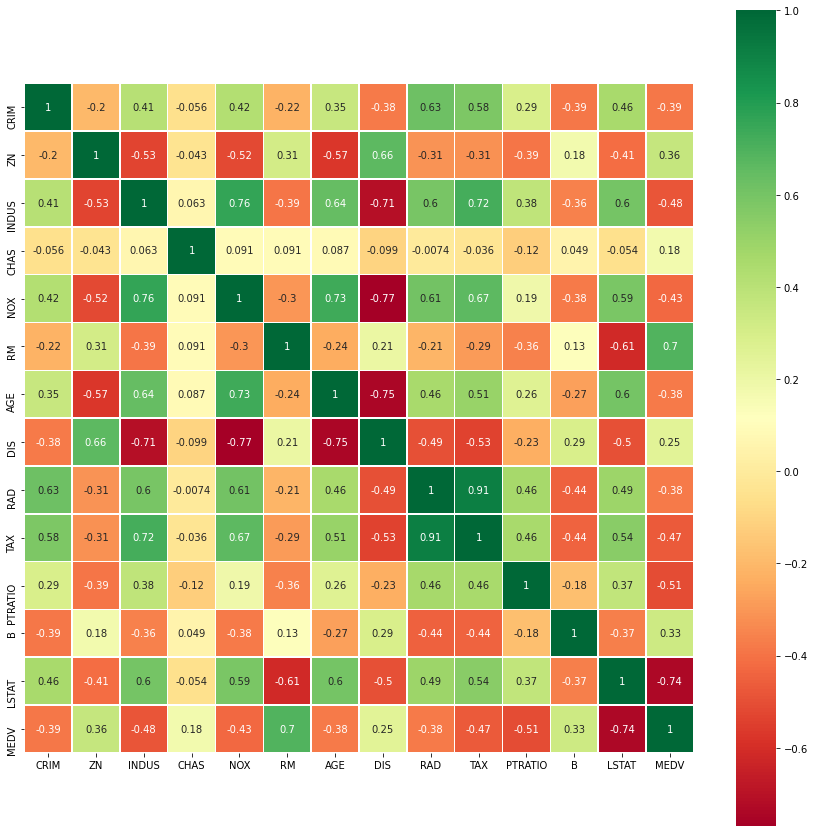

In [5]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(df.corr(),
            square = True,
            cmap = 'RdYlGn',
            annot = True,
            linewidth = 0.5,
            ax = ax)

as we can see in the correlation graph, we can find out that the ther is a green spot between <b>rm</b> and <b>medv</b> also we can see the relation shows green between <b>nox</b> and <b>indus</b> lets plot them and see how their correlations are

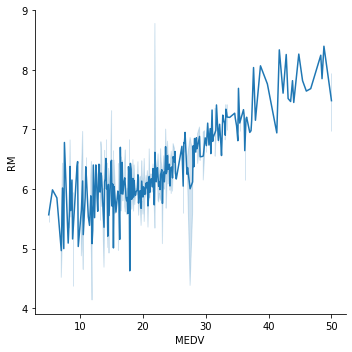

In [6]:
sns.relplot(x= 'MEDV',
            y = 'RM',
            kind = 'line',
            data = df)
#we can see that in the mean ther is a straight line which shows positive correlation

<h4>The principle behind linear regression</h4>
basically for all the variables whiich we are going to choose we will draw a line which is such that the distance between the data points and the mean line is the least across all dimentions.
the factor which determines this is called as the <b>residual</b> but this residual can cancel out with negative distancing thus to avoid such problems we generally square the distance and ensure its minimacy
this function is known as the <b>loss function</b> 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [8]:
X_train, X_test, y_train, y_test = train_test_split(boston.data,
                                                    boston.target, 
                                                    test_size = 0.3,
                                                    random_state = 42
                                                   )

In [9]:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
op = reg_all.predict(X_test)
reg_all.score(X_test, y_test)
# we see that the accuracy is not quite good with he model because this is a very general regression 
#whihc is not generally used

0.711226005748496

In [10]:
#now lets figure out the rmse (root mean squared error)
rmse = np.sqrt(mean_squared_error(op, y_test))
print(rmse)

4.638689926172797


<h4> he reason for cross validation</h4>

<p> the sample we have chosen for testing might not represent the entire dataset and there are chances that the sample we have chosen for testing is a biased set which has a class of data points in a large number thus in order to reduce this ckind of errors we use cross validtion where the data will be split into sevaral parts and then tested whihc will make our prediction more authentic

In [11]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [12]:
#here we will perform 10 cross validations and then find out the mean of the given data 
reg = LinearRegression()
ten_cross_validation = cross_val_score(reg,
                                      boston.data,
                                      boston.target,
                                      cv = 10 #this is the number of cross validations which are to be performed
                                     )
print(ten_cross_validation)
print(np.mean(ten_cross_validation))

[ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]
0.2025289900605657


In [13]:
%timeit cross_val_score(reg, boston.data, boston.target, cv = 5)
%timeit cross_val_score(reg, boston.data, boston.target, cv = 10)

17.2 ms ± 567 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
32.5 ms ± 2.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


As we can see that the computation time and the computation speed of that is been executed is highly varying and the we cant cross validate indefenitely

<h4>Ridge and Lasso regression</h4> 

ridge and lasso regression are used to reduce over fitting of a model by penalising the values of the slope which are very high
the lasso regression removes values which are not very relavant for the model and only keeps the models which have the most relevance in predicting the target value

In [14]:
#ridge
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.1, normalize = True)
ridge_validation = cross_val_score(ridge, boston.data, boston.target, cv = 5)
print(ridge_validation)
print(np.mean(ridge_validation))
print("\n")

[0.71413865 0.74561711 0.58437172 0.16257959 0.06290917]
0.4539232483386577




In [15]:
#linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
linear_validation = cross_val_score(reg, boston.data, boston.target, cv = 5)
print(linear_validation)
print(np.mean(linear_validation))

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
0.3532759243958772


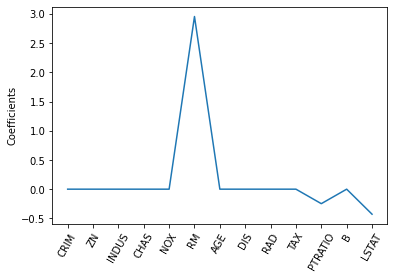

[-0.          0.         -0.          0.         -0.          2.95469455
 -0.          0.         -0.         -0.         -0.24795837  0.
 -0.42817439]


In [16]:
#lasso regression
from sklearn.linear_model import Lasso
names = df.drop('MEDV', axis=1).columns
lasso = Lasso(alpha=0.1, normalize = True)
lasso_coef = lasso.fit(boston.data, boston.target).coef_
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation=60)
plt.ylabel('Coefficients')
plt.show()
print(lasso_coef) #we can see that the coeffecients are highly penalized to make the most important attribute show up